# 서울시 공유자전거 '따릉이' 수요 예측 프로젝트
## 단계1. 데이터 전처리

## 0.프로젝트 소개

### (1) 수행 목표 
여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

#### 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

    * 1.데이터를 탐색하며 정보 획득
        * 날씨 데이터와 서울시 공유 자전거 따릉이의 수요 데이터를 제공해드렸습니다. 
        * 우리는 따릉이의 수요와 날씨간 어떤 연관성이 있는지 탐색 해 봅시다.
    * 2.EDA
        * 주어진 데이터의 변수들을 분석해 봅시다. 


### (2) 데이터 소개

#### 1) 기본 데이터

        * 학습데이터 : sbikedata.csv

#### 2) 데이터셋의 변수 소개

        * date : 날짜
        * hour : 시간
        * temperature : 온도
        * precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
        * windspeed : 풍속(평균)
        * humidity : 습도
        * visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
        * ozone : 오존 수치
        * PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
        * PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
        * count : 시간에 따른 따릉이 대여 수


## 1.환경설정

* 세부 요구사항
    - 경로 설정 
        * 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정 및 라이브러리 로딩
* 이번 프로젝트는 로컬환경에서 진행합니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [4]:
path = 'sbikedata.csv'

#### 2) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (2) 데이터 불러오기
* 주어진 데이터셋
    * 따릉이 수요 및 날씨 데이터 : sbikedata.csv

#### 1) 데이터로딩

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data=pd.read_csv(path)

#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.head()


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.tail()


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5827.000000,5725.000000,5732.000000,5699.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
mean,11.506607,31.970655,15.666609,0.031811,19.376798,0.075511,2.237601,68.608718,1758.438648,215.117899
std,6.921963,42.987292,13.850990,0.018277,7.501572,0.264236,1.054516,17.277266,490.969394,185.972900
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.000000,60.000000,1.000000
25%,6.000000,16.000000,7.000000,0.019000,14.100000,0.000000,1.500000,56.000000,1935.500000,53.000000
50%,12.000000,25.000000,13.000000,0.031000,20.400000,0.000000,2.200000,70.000000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.000000,2000.000000,315.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.000000,2000.000000,1746.000000


In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


## 2.EDA 1단계 - 데이터 기본 탐색

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        1. 변수가 내포하고 있는 의미
        2. 변수가 수치형인지, 범주형인지
        3. 결측치 존재 여부 및 조치 방안
        4. 기초 통계량 확인
        5. 데이터 분포 확인
        6. 위 정보로부터 파악한 내용 정리
        7. 추가 분석사항 도출

### (1) 변수별 단변량 분석

#### 1) Feature1 : hour

In [141]:
from statsmodels.imputation import mice

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data['hour'].value_counts()

hour
1     243
14    243
23    243
22    243
21    243
20    243
19    243
18    243
17    243
16    243
15    243
13    243
12    243
11    243
10    243
9     243
8     243
7     243
5     243
0     243
2     242
6     242
3     242
4     241
Name: count, dtype: int64

변수가 내포하고 있는 의미
- 시간을 24시로 표현

변수가 수치형인지 범주형인지
- 시간은 범주형? 수치형?

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
범주


변수의 결측치 존재 여부 및 조치방안

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['hour'].isnull().any()

False

변수의 기초 통계량 확인

In [83]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

변수의 분포 확인
* kdeplot 활용

<Axes: xlabel='hour', ylabel='Density'>

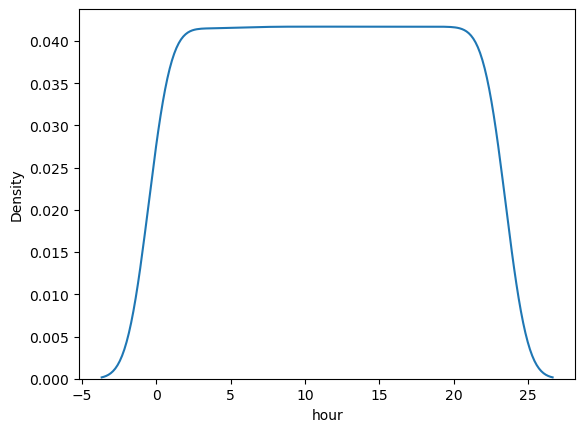

In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.kdeplot(data['hour'])

위 정보로 부터 파악한 내용 정리
- 데이터의 '시간' 열은 5827개 row로 구성되어있으며 결측치는 없음
- 0시 및 일부 중간시간대 데이터가 비어있음

#### 2) Feature2 : temperature

In [78]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
temp='temperature'

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 온도


In [37]:
print(data[temp].value_counts())
print(data[temp].value_counts(normalize=True))

temperature
 21.1    50
 24.1    50
 22.0    45
 20.9    44
 18.8    43
         ..
 34.1     1
 36.1     1
 36.0     1
 35.6     1
-0.8      1
Name: count, Length: 377, dtype: int64
temperature
 21.1    0.008581
 24.1    0.008581
 22.0    0.007723
 20.9    0.007551
 18.8    0.007379
           ...   
 34.1    0.000172
 36.1    0.000172
 36.0    0.000172
 35.6    0.000172
-0.8     0.000172
Name: proportion, Length: 377, dtype: float64


변수가 수치형인지 범주형인지
- 기온은 수치형? 범주형?

In [38]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data[temp].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


변수의 결측치 존재 여부 및 조치방안

In [39]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data[temp].isnull().any()

False

변수의 기초 통계량 확인

In [81]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data[temp].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

변수의 분포 확인

<Axes: xlabel='temperature', ylabel='Count'>

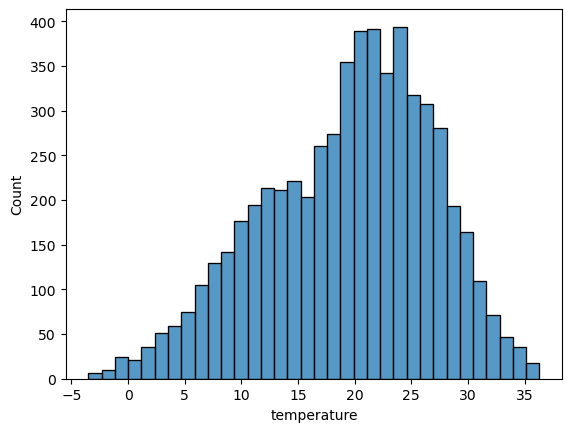

In [41]:
sns.histplot(data[temp])

위 정보로 부터 파악한 내용 정리


#### 3) Feature3 : precipitation

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 강우 여부 (비가 안왔으면 0, 왔으면 1)

In [84]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
temp='precipitation'

In [51]:
data[temp]

0       0
1       0
2       0
3       0
4       0
       ..
5822    0
5823    0
5824    0
5825    0
5826    0
Name: precipitation, Length: 5827, dtype: int64

In [48]:
print(data[temp].value_counts())
print(data[temp].value_counts(normalize=True))

precipitation
0    5387
1     440
Name: count, dtype: int64
precipitation
0    0.924489
1    0.075511
Name: proportion, dtype: float64


변수가 수치형인지 범주형인지
- 1시간 전 강우 유무는 범주형? 수치형?

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

범

변수의 결측치 존재 여부 및 조치 방안


In [44]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data[temp].isnull().any()

False

변수의 기초 통계량 확인

In [85]:
data[temp].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

변수의 분포 확인

<Axes: xlabel='precipitation', ylabel='Count'>

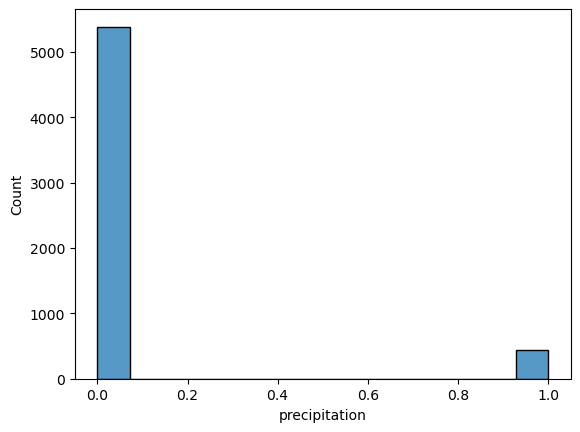

In [56]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.histplot(data[temp])

위 정보로 부터 파악한 내용 정리


#### 4) Feature4 : windspeed

In [87]:
temp='windspeed'

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 풍속, 풍량

In [88]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data[temp].head()

0    1.4
1    2.1
2    3.4
3    3.1
4    2.9
Name: windspeed, dtype: float64

변수가 수치형인지 범주형인지


In [61]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data[temp].value_counts())
print(data[temp].value_counts(normalize=True))


windspeed
2.3    255
2.2    246
2.1    242
1.9    239
1.7    235
      ... 
6.9      1
5.8      1
6.8      1
6.4      1
6.2      1
Name: count, Length: 72, dtype: int64
windspeed
2.3    0.043762
2.2    0.042217
2.1    0.041531
1.9    0.041016
1.7    0.040330
         ...   
6.9    0.000172
5.8    0.000172
6.8    0.000172
6.4    0.000172
6.2    0.000172
Name: proportion, Length: 72, dtype: float64


변수의 결측치 존재 여부 및 조치방안

In [62]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data[temp].isnull().any()


False

변수의 기초 통계량 확인

In [90]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data[temp].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

변수의 분포 확인

<Axes: xlabel='windspeed', ylabel='Density'>

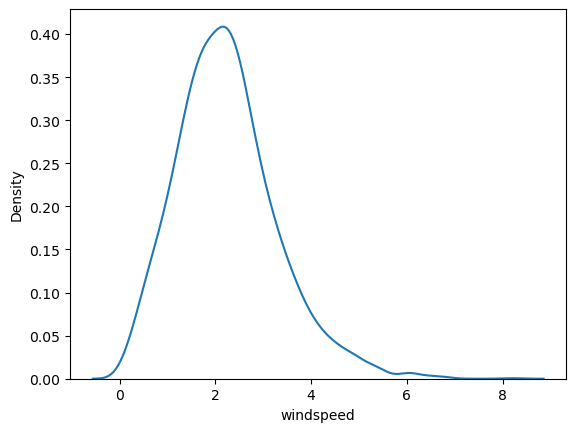

In [64]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.kdeplot(data[temp])


위 정보로 부터 파악한 내용 정리


#### 5) Feature5 : humidity

In [91]:
temp='humidity'

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 습도

In [66]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data[temp].head()

0    49
1    53
2    43
3    44
4    44
Name: humidity, dtype: int64

변수가 수치형인지 범주형인지


In [67]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

print(data[temp].value_counts())
print(data[temp].value_counts(normalize=True))


humidity
70    142
76    138
75    128
63    127
77    127
     ... 
24      4
20      3
21      2
22      2
19      1
Name: count, Length: 82, dtype: int64
humidity
70    0.024369
76    0.023683
75    0.021967
63    0.021795
77    0.021795
        ...   
24    0.000686
20    0.000515
21    0.000343
22    0.000343
19    0.000172
Name: proportion, Length: 82, dtype: float64


변수의 결측치 존재 여부 및 조치방안

In [68]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data[temp].isnull().any()

False

변수의 기초 통계량 확인

In [92]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data[temp].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

변수의 분포 확인

<Axes: xlabel='humidity', ylabel='Density'>

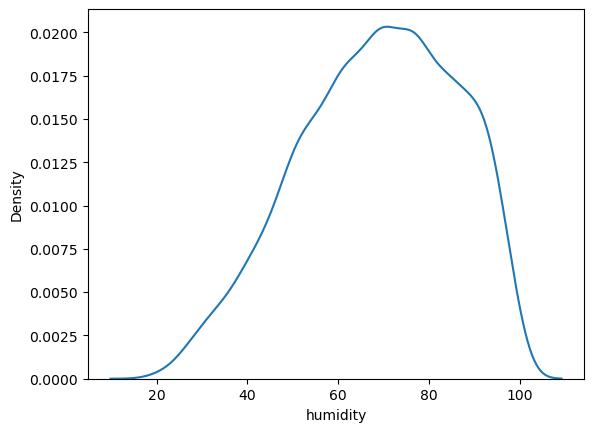

In [93]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.kdeplot(data[temp])

위 정보로 부터 파악한 내용 정리


#### 6) Feature6 : visibility

In [94]:
temp='visibility'

변수가 내포하고 있는 의미
- 대여 시점의 시계 (시정 거리)

In [99]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data[temp]

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
5822    1193
5823    1233
5824    1250
5825    1262
5826    1483
Name: visibility, Length: 5827, dtype: int64

변수가 수치형인지 범주형인지

In [95]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

print(data[temp].value_counts())
print(data[temp].value_counts(normalize=True))

visibility
2000    4218
1996       8
1984       7
1992       7
1997       6
        ... 
1756       1
313        1
848        1
1406       1
1250       1
Name: count, Length: 1032, dtype: int64
visibility
2000    0.723872
1996    0.001373
1984    0.001201
1992    0.001201
1997    0.001030
          ...   
1756    0.000172
313     0.000172
848     0.000172
1406    0.000172
1250    0.000172
Name: proportion, Length: 1032, dtype: float64


변수의 결측치 존재 여부 및 조치방안

In [100]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data[temp].isnull().any()

False

변수의 기초 통계량 확인

In [101]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data[temp].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

변수의 분포 확인

<Axes: xlabel='visibility', ylabel='Density'>

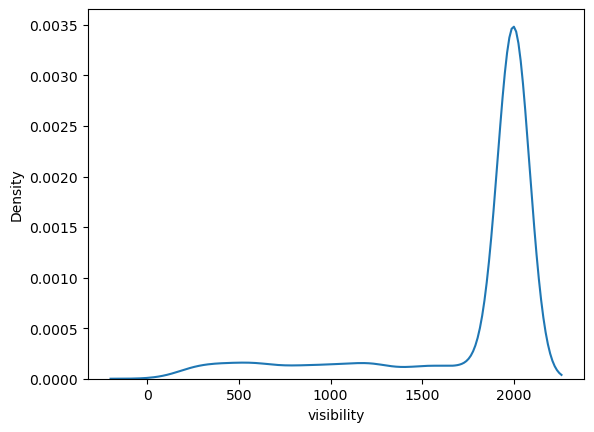

In [102]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.kdeplot(data[temp])


위 정보로 부터 파악한 내용 정리


#### 7) Feature7 : ozone

In [142]:
temp='ozone'

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 오존 수치

In [143]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data['ozone']

0       0.002
1       0.003
2       0.023
3       0.028
4       0.008
        ...  
5822    0.002
5823    0.002
5824    0.002
5825    0.001
5826    0.004
Name: ozone, Length: 5827, dtype: float64

변수가 수치형인지 범주형인지


In [144]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data[temp].value_counts())
print(data[temp].value_counts(normalize=True))


ozone
0.002    177
0.031    170
0.034    162
0.029    161
0.032    160
        ... 
0.115      1
0.099      1
0.116      1
0.110      1
0.106      1
Name: count, Length: 109, dtype: int64
ozone
0.002    0.031058
0.031    0.029830
0.034    0.028426
0.029    0.028251
0.032    0.028075
           ...   
0.115    0.000175
0.099    0.000175
0.116    0.000175
0.110    0.000175
0.106    0.000175
Name: proportion, Length: 109, dtype: float64


변수의 결측치 존재 여부 및 조치방안

In [145]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data[temp].isnull().any()

True

만약 결측치가 존재한다면?-> 어떻게 처리할 것인가?

In [170]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 'ozone' 컬럼의 결측값을 앞뒤 관측값으로 선형 보간
t1 = data['ozone'].interpolate(method='linear')

변수의 기초 통계량 확인

In [171]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
t1.describe()

count    5827.000000
mean        0.031634
std         0.018263
min         0.001000
25%         0.019000
50%         0.030000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

변수의 분포 확인

<Axes: xlabel='ozone', ylabel='Density'>

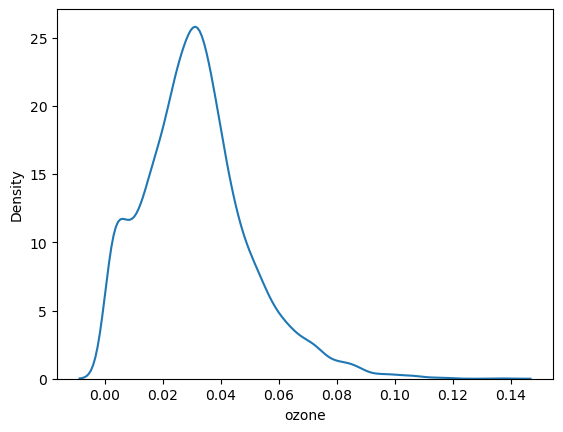

In [148]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.kdeplot(t1)

위 정보로 부터 파악한 내용 정리


In [114]:
#오존수치가 떨어졌다

#### 8) Feature8 : PM10

In [162]:
temp='PM10'

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 미세먼지 농도

In [116]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data[temp]


0       42.0
1       41.0
2       30.0
3       27.0
4       29.0
        ... 
5822    74.0
5823    65.0
5824    51.0
5825    43.0
5826    39.0
Name: PM10, Length: 5827, dtype: float64

변수가 수치형인지 범주형인지


In [163]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data[temp].value_counts()
#print(data[temp].value_counts(normalize=True))


PM10
18.0     181
22.0     179
20.0     177
16.0     174
23.0     173
        ... 
296.0      1
373.0      1
433.0      1
479.0      1
332.0      1
Name: count, Length: 189, dtype: int64

변수의 결측치 존재 여부 및 조치방안

In [118]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data[temp].isnull().any()


True

In [164]:
t1 = data["temp"].interpolate(method='linear')

변수의 기초 통계량 확인

In [165]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

t1.describe()

count    5827.000000
mean       31.833705
std        42.650908
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

변수의 분포 확인

<Axes: xlabel='PM10', ylabel='Density'>

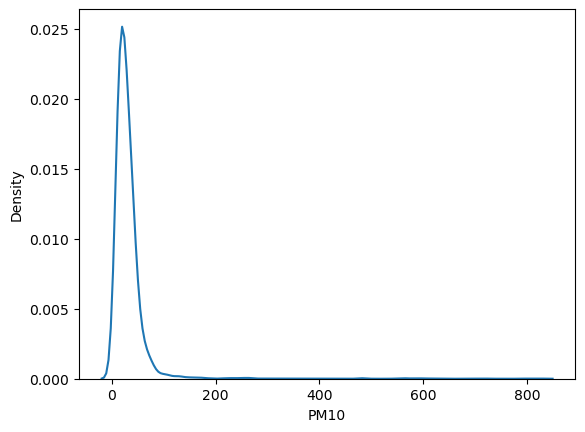

In [152]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.kdeplot(t1)


위 정보로 부터 파악한 내용 정리


In [123]:
#잠깐높았다가낮아짐

#### 9) Feature9 : PM2.5

In [153]:
temp='PM2.5'

변수가 내포하고 있는 의미
- 따릉이 대여시점의 초미세먼지 수치

In [126]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data[temp]

0       21.0
1       21.0
2       13.0
3       12.0
4       14.0
        ... 
5822    58.0
5823    56.0
5824    41.0
5825    35.0
5826    31.0
Name: PM2.5, Length: 5827, dtype: float64

변수가 수치형인지 범주형인지


In [127]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

print(data[temp].value_counts())
print(data[temp].value_counts(normalize=True))

PM2.5
5.0      265
7.0      262
11.0     259
12.0     256
13.0     255
        ... 
115.0      1
117.0      1
106.0      1
86.0       1
82.0       1
Name: count, Length: 110, dtype: int64
PM2.5
5.0      0.046232
7.0      0.045708
11.0     0.045185
12.0     0.044662
13.0     0.044487
           ...   
115.0    0.000174
117.0    0.000174
106.0    0.000174
86.0     0.000174
82.0     0.000174
Name: proportion, Length: 110, dtype: float64


변수의 결측치 존재 여부 및 조치방안

In [128]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data[temp].isnull().any()

True

In [168]:
#결측치 제거
t1 = data['PM10'].interpolate(method='linear')

변수의 기초 통계량 확인

In [167]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

t1.describe()

count    5827.000000
mean       31.833705
std        42.650908
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

변수의 분포 확인

<Axes: xlabel='PM10', ylabel='Density'>

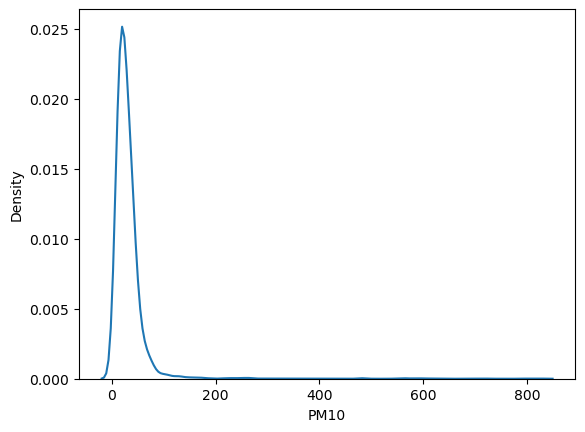

In [169]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.kdeplot(t1)

위 정보로 부터 파악한 내용 정리


#### 10) Count (Target)

In [132]:
temp ='count'

In [133]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data[temp]

0        46
1        40
2        31
3        12
4        30
       ... 
5822    273
5823    228
5824    215
5825    125
5826     95
Name: count, Length: 5827, dtype: int64

변수가 내포하고 있는 의미
- 따릉이의 대여량 -> 우리가 예측해야 할 변수!

In [134]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data[temp].value_counts())
print(data[temp].value_counts(normalize=True))


count
20     45
16     45
24     44
21     44
25     44
       ..
553     1
789     1
803     1
794     1
519     1
Name: count, Length: 757, dtype: int64
count
20     0.007723
16     0.007723
24     0.007551
21     0.007551
25     0.007551
         ...   
553    0.000172
789    0.000172
803    0.000172
794    0.000172
519    0.000172
Name: proportion, Length: 757, dtype: float64


변수가 수치형인지 범주형인지


변수의 결측치 존재 여부 및 조치 방안

In [135]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data[temp].isnull().any()



False

변수의 기초 통계량 확인

In [136]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data[temp].describe()


count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

변수의 분포 확인

<Axes: xlabel='count', ylabel='Density'>

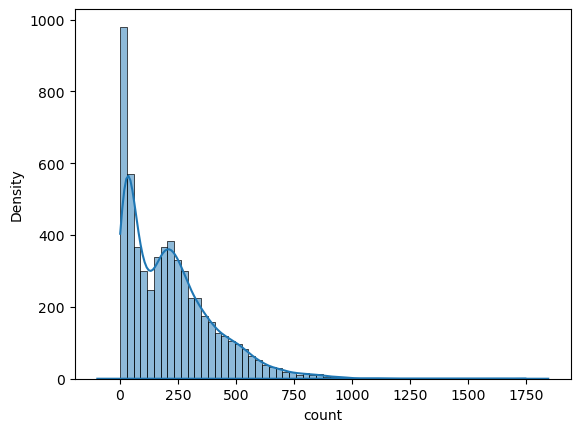

In [139]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.kdeplot(data[temp])
sns.histplot(data[temp], kde=True)

위 정보로 부터 파악한 내용 정리


In [160]:
#기온 18~28 정도의 맑은날로 추정되는 날에 이용량이 높다
#비오는 날엔 안탄다